In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle

pd.options.display.float_format = '{:.0f}'.format

In [2]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Hate'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [3]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

## Default SVM

In [4]:
SVM_default = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

In [5]:
# train classifier
print("training...")
SVM_default.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_default.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [6]:
SVM_metrics = {}
SVM_default_precision = precision_score(y_test, SVM_test_preds)
SVM_default_recall = recall_score(y_test, SVM_test_preds)
SVM_default_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_default_precision))
print('Recall: {:.3}'.format(SVM_default_recall))
print('Macro F1 Score: {:.3}'.format(SVM_default_macro_f1_score))

SVM_metrics['Default SVM'] = {'precision': SVM_default_precision, 'recall': SVM_default_recall, 
                              'macro_f1': SVM_default_macro_f1_score}

Model evaluation metrics
Precision: 0.776
Recall: 0.538
Macro F1 Score: 0.789


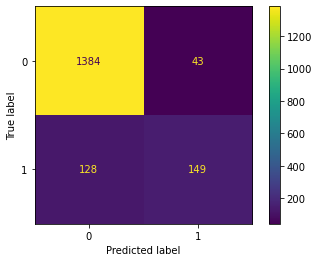

In [7]:
plot_confusion_matrix(SVM_default, count_test, y_test)

## Grid Search SVM

In [8]:
SVM_default_grid = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid = GridSearchCV(SVM_default_grid, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid.fit(count_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.457, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.764, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.743, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.836, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.808, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.797, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.8

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.790, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.751, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.781, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.748, total=   1.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.782, total=   1.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.750, total=   1.6s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.827, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.808, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.790, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.803, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.783, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.844, total=   0.5s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.836, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.808, total=   0.7s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.827, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.790, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.801, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.764, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.745, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.764, total=   0.7s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.801, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.764, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.745, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.764, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.743, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.462, total=   0.8s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.753, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.780, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.755, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.836, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.808, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.797, total=   0.6s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.790, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.457, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.457, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.836, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.808, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.797, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.827, total=   0.6s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.832, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.819, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.812, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.828, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.793, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.801, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.830, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.806, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.816, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.827, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.812, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.767, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.832, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.834, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.809, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.838, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.838, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.805, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.555, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.572, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.537, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.829, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.830, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.806, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.816, total=   1.3s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.764, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.742, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.832, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.834, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.809, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.838, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.805, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.844, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.827, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.797, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.832, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.829, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.830, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.806, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.816, total=   1.3s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.138, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.138, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.832, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.834, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.809, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.838, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.805, total=   0.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.830, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.834, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.811, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.829, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.820, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.804, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.779, total=   1.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.823, total=   1.4s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.784, total=   0.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.810, total=   0.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.785, total=   0.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.815, total=   0.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.773, total=   0.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.597, total=   1.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.550, total=   1.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.580, total=   1.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.538, total=   1.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.844, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.835, total=   0.7s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.779, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.823, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.781, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.809, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.786, total=   0.5s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.777, total=   0.5s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.784, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.810, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.785, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.815, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.773, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.839, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.808, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.836, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.787, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.457, total=   0.7s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.833, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.802, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.815, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.784, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.768, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.786, total=   0.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.784, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.810, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.785, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.815, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.773, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.838, total=   0.6s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.753, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.776, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.757, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.820, total=   1.3s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.804, total=   1.4s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.779, total=   1.4s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.810, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.785, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.815, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.773, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.800, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.805, total=   0.7s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.832, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.834, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.809, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.838, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.805, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.821, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.820, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.783, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.827, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.743, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.801, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.764, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.745, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.812, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.833, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.807, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.800, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.815, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.815, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.783, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.819, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.776, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.832, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.770, total=   1.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.751, total=   1.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.764, total=   1.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.742, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.821, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.8

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.748, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.743, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.462, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.830, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.802, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.800, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.792, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.800, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.815, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.783, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.819, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.776, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.832, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.832, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.799, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.802, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.792, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.821, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.8

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.748, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.743, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.764, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.745, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.766, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.743, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.800, total=   0.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.806, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.815, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.767, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.818, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.816, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.820, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.806, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.777, total=   1.5s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.743, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.462, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.469, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.801, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.787, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.806, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.815, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.818, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.816, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.794, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.821, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.785, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.842, total=   0.7s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.777, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.825, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.768, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.784, total=   0.4s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.759, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.758, total=   0.4s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.787, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.806, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.815, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.767, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.826, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.795, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.830, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.800, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.801, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.764, total=   0.7s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.837, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.787, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.462, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.469, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.787, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.806, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.815, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.767, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.833, total=   0.7s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.797, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.821, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.788, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.820, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.806, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.777, total=   1.4s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.750, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.801, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.770, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.752, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.764, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.829, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.814, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.798, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.811, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.823, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.759, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.842, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.818, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.457, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.823, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.819, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.780, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.768, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.783, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.750, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.830, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.841, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.807, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.830, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.812, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.798, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.811, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.786, total=   0.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.823, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.759, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.808, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.834, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.795, total=   0.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.795, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.794, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.819, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.780, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.768, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.783, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.750, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.801, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.767, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.748, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.767, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.746, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.798, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.811, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.786, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.823, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.759, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.824, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.824, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.800, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.830, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.792, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 47.0min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [9]:
#print best score obtained and the parameters which obtained it
print('Macro F1 Score:', SVM_grid.best_score_)
print('Best Hyperparameters:', SVM_grid.best_params_)
print('Model object with best parameters: ')
print(SVM_grid.best_estimator_)

Macro F1 Score: 0.8335817373214726
Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'coef0': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Model object with best parameters: 
SVC(C=1, class_weight='balanced', coef0=1, gamma=0.1, kernel='poly',
    random_state=12)


In [10]:
# train classifier
print("training...")
SVM_grid.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_grid.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [11]:
SVM_grid_precision = precision_score(y_test, SVM_test_preds)
SVM_grid_recall = recall_score(y_test, SVM_test_preds)
SVM_grid_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_grid_precision))
print('Recall: {:.3}'.format(SVM_grid_recall))
print('Macro F1 Score: {:.3}'.format(SVM_grid_macro_f1_score))

SVM_metrics['Grid Search SVM'] = {'precision': SVM_grid_precision, 'recall': SVM_grid_recall, 
                                  'macro_f1': SVM_grid_macro_f1_score}

Model evaluation metrics
Precision: 0.749
Recall: 0.657
Macro F1 Score: 0.823


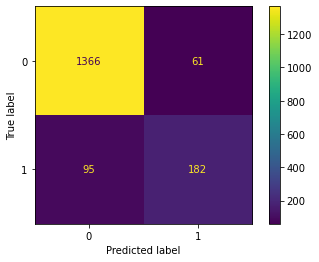

In [12]:
plot_confusion_matrix(SVM_grid.best_estimator_, count_test, y_test)

## Default SVM with POS tags

In [13]:
#create a column of pos tagged words in each tweet
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

tweets = df.clean_text
tweet_tags = []

for t in tweets:
    tokens = nltk.word_tokenize(t)
    tags = nltk.pos_tag(tokens)
    new_text = []
    for word in tags:
        new_text.append(word[0] + "_" + word[1])
    tweet_tags.append(new_text)
    
tagged_tokens = []
for tweet in tweet_tags:
    sent = ' '.join(tweet)
    new_tokens = tokenizer.tokenize(sent)
    tagged_tokens.append(new_tokens)
    
df['pos_tags'] = tagged_tokens
df['pos_tags'] = df['pos_tags'].apply(lambda x: ' '.join(map(str, x)))

df.head(5)


,id,text,Annotation,clean_text,clean_text_sl,Hate,pos_tags
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0,i_NN just_RB found_VBD the_DT perfect_JJ renta...
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0,every_DT time_NN they_PRP discover_VBP anythin...
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0,ok_JJ time_NN to_TO write_VB code_NN bbl_NN ma...
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0,refined_VBN dessert_NN not_RB mkr_VB
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0,one_CD of_IN the_DT best_JJS things_NNS anyone...


In [14]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df['pos_tags'], df['Hate'], test_size=0.25, random_state=12)
                                                       
count_train_pos = counts.fit_transform(X_train_pos)
count_test_pos = counts.transform(X_test_pos)

In [15]:
SVM_default_pos = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

In [16]:
# train classifier
print("training...")
SVM_default_pos.fit(count_train_pos, y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds_pos = SVM_default_pos.predict(count_test_pos)
print("complete.")

training...
complete.
predicting...
complete.


In [17]:
SVM_pos_precision = precision_score(y_test_pos, SVM_test_preds_pos)
SVM_pos_recall = recall_score(y_test_pos, SVM_test_preds_pos)
SVM_pos_macro_f1_score = f1_score(y_test_pos, SVM_test_preds_pos, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_pos_precision))
print('Recall: {:.3}'.format(SVM_pos_recall))
print('Macro F1 Score: {:.3}'.format(SVM_pos_macro_f1_score))

SVM_metrics['Default SVM with POS'] = {'precision': SVM_pos_precision, 'recall': SVM_pos_recall, 
                                       'macro_f1': SVM_pos_macro_f1_score}

Model evaluation metrics
Precision: 0.804
Recall: 0.415
Macro F1 Score: 0.742


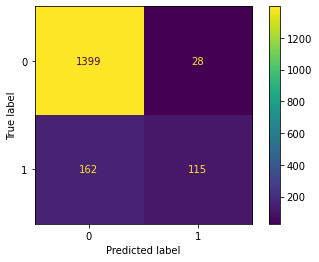

In [18]:
plot_confusion_matrix(SVM_default_pos, count_test_pos, y_test_pos)

## Grid search SVM with POS tags

In [19]:
SVM_grid_pos = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid_pos = GridSearchCV(SVM_grid_pos, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid_pos.fit(count_train_pos, y_train_pos)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.457, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.457, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.589, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.581, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.806, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.793, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.777, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.7

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.761, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.653, total=   2.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.658, total=   2.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.652, total=   2.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.638, total=   2.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.593, total=   2.6s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.722, total=   2.2s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.710, total=   2.2s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.697, total=   2.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.712, total=   2.2s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.702, total=   2.2s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.702, total=   0.7s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.457, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.806, total=   1.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.793, total=   1.4s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.789, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.761, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.520, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.611, total=   1.2s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.592, total=   1.2s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.595, total=   1.2s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.792, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.765, total=   1.5s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.740, total=   1.5s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.749, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.734, total=   1.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   1.1s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.686, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.703, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.681, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.806, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.793, total=   1.1s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.777, total=   1.1s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.761, total=   1.1s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.457, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.457, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   0.8s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.806, total=   1.2s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.793, total=   1.2s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.777, total=   1.2s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.789, total=   1.2s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.827, total=   1.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.779, total=   1.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.782, total=   1.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.780, total=   1.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.764, total=   1.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.792, total=   1.3s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.744, total=   2.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.723, total=   2.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.745, total=   2.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.741, total=   2.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.711, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   2.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.748, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.796, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.803, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.796, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.782, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.782, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.775, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.567, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.582, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.577, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.138, total=   2.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.138, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.749, total=   2.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.744, total=   2.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.723, total=   2.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.745, total=   2.5s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   2.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   2.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.750, total=   2.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.741, total=   2.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.796, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.803, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.796, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.782, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.775, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.829, total=   2.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.805, total=   2.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.768, total=   2.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.779, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.138, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.138, total=   2.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.749, total=   2.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.744, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.723, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.745, total=   2.7s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   2.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   2.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   2.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   2.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.796, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.803, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.796, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.782, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.775, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.829, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.786, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.782, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.787, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.456, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.456, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.757, total=   2.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.731, total=   2.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.716, total=   2.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.739, total=   2.5s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.776, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.788, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.766, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.786, total=   1.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.759, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.605, total=   3.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.596, total=   3.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.603, total=   2.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.556, total=   3.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.819, total=   1.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.813, total=   1.3s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.716, total=   2.3s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.739, total=   2.2s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.708, total=   2.2s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.686, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.649, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.665, total=   0.6s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.776, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.788, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.766, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.786, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.759, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.814, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.795, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.795, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.772, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.457, total=   1.1s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.787, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.764, total=   1.2s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.786, total=   1.0s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.765, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.742, total=   1.1s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.749, total=   1.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.776, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.788, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.766, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.786, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.759, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.806, total=   1.1s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.740, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.749, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.732, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.757, total=   2.3s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.731, total=   2.3s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.716, total=   2.2s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.457, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.788, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.766, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.786, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.759, total=   1.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.792, total=   1.1s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.779, total=   1.1s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.796, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.803, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.796, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.782, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.775, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.138, total=   2.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.753, total=   2.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.735, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.714, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.742, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.581, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.701, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.451, total=   2.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.372, total=   2.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.461, total=   2.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.792, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.797, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.796, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.777, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.806, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.806, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.756, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.788, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.760, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.796, total=   1.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.777, total=   2.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.759, total=   2.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.740, total=   2.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.754, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.753, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.7

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.631, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.602, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.581, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.701, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   2.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.819, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.787, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.786, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.775, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.777, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.806, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.756, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.788, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.760, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.796, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.805, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.778, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.772, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.775, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.753, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.7

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.631, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.602, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.581, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.701, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.415, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.476, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.433, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.467, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.777, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.785, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.771, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.792, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.752, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.779, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.787, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.757, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.724, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.717, total=   2.2s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.457, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.761, total=   1.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.780, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.785, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.771, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.792, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.779, total=   1.0s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.787, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.762, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.780, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.763, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.816, total=   1.2s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.717, total=   2.2s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.739, total=   2.2s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.708, total=   2.2s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.659, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.640, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.644, total=   0.6s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   1.1s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.780, total=   0.9s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.785, total=   1.0s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.771, total=   0.9s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.792, total=   0.9s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.752, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.797, total=   1.2s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.780, total=   1.2s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.780, total=   1.2s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.765, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.463, total=   1.1s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.783, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.756, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.457, total=   1.0s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   1.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.780, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.785, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.771, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.792, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.752, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.820, total=   1.6s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.777, total=   1.5s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.785, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.763, total=   1.5s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.757, total=   3.0s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.724, total=   2.9s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.717, total=   2.9s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.741, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.769, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.774, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.758, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.739, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.806, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.795, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.778, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.801, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.772, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.772, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.793, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.751, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.819, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.798, total=   2.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.457, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.756, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.787, total=   2.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.776, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.746, total=   2.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.753, total=   2.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.741, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.810, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.822, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.783, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.796, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.783, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.778, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.801, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.772, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.793, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.751, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.791, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.793, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.764, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.769, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.764, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.787, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.776, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.746, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.753, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.741, total=   2.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.771, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.782, total=   2.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.758, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.737, total=   2.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.747, total=   2.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.778, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.801, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.772, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.793, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.751, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.797, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.803, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.794, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.782, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.775, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 82.2min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [20]:
# train classifier
print("training...")
SVM_grid_pos.best_estimator_.fit(count_train_pos, y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds_pos = SVM_grid_pos.best_estimator_.predict(count_test_pos)
print("complete.")

training...
complete.
predicting...
complete.


In [21]:
SVM_grid_pos_precision = precision_score(y_test_pos, SVM_test_preds_pos)
SVM_grid_pos_recall = recall_score(y_test_pos, SVM_test_preds_pos)
SVM_grid_pos_macro_f1_score = f1_score(y_test_pos, SVM_test_preds_pos, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_grid_pos_precision))
print('Recall: {:.3}'.format(SVM_grid_pos_recall))
print('Macro F1 Score: {:.3}'.format(SVM_grid_pos_macro_f1_score))

SVM_metrics['Grid Search SVM with POS'] = {'precision': SVM_grid_pos_precision, 'recall': SVM_grid_pos_recall, 
                                           'macro_f1': SVM_grid_pos_macro_f1_score}

Model evaluation metrics
Precision: 0.699
Recall: 0.646
Macro F1 Score: 0.805


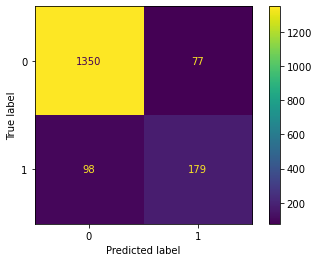

In [22]:
plot_confusion_matrix(SVM_grid_pos.best_estimator_, count_test_pos, y_test_pos)

In [23]:
#compare parameters
results = pd.DataFrame.from_dict(SVM_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\SVM_count_results.csv",
               index=True)

In [24]:
pd.options.display.float_format = '{:.4f}'.format
results

,precision,recall,macro_f1
Default SVM,0.7760,0.5379,0.7886
Grid Search SVM,0.7490,0.6570,0.8230
Default SVM with POS,0.8042,0.4152,0.7420
Grid Search SVM with POS,0.6992,0.6462,0.8054
